In [43]:
# basics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels.api as sm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import validation_curve

In [2]:
# Load Data
filename = "AML and ATF Modelling Assignment data_std.xlsx" 
data_df = pd.read_excel(filename,
              sheet_name='data')
data_df.shape

(588, 151)

In [3]:
data_df.head()

,cust_tenure,cust_cdn_resident,prod_sav,prod_primary_sav_cnt,prod_cda,prod_primary_cda_cnt,prod_mor,prod_primary_mor_cnt,prod_llc,prod_primary_llc_cnt,...,acct_type_num,tot_acct_num,tot_cross_border_val_12m,tot_cash_val_5m,tot_cross_border_cnt_12m,tot_cash_cnt_5m,avg_cash_5m,avg_wire_12m,cust_id_masked,rating
0,-1.024753,0.231869,-0.827535,-0.677491,-1.187365,-0.989953,-0.391077,-0.324689,1.840668,1.333540,...,-0.874462,-0.784422,-0.128725,-0.378492,-0.291457,-0.835541,-0.400281,-0.140963,004f8eab603ba30ea8fffd64ef39d5a990aff66b35f447...,0
1,-0.802710,-4.312772,1.208408,0.548246,0.842201,0.297862,-0.391077,-0.324689,-0.543281,-0.494249,...,-0.175843,-0.484331,-0.128725,0.027173,-0.291457,-0.576554,1.707971,-0.140963,00a38e35a8350be0d0d2ef2c7c40de54f049ff8359b54e...,1
2,-0.893597,0.231869,-0.827535,-0.677491,-1.187365,-0.989953,-0.391077,-0.324689,1.840668,1.333540,...,-0.874462,-0.784422,-0.128725,-0.378492,-0.291457,-0.835541,-0.400281,-0.140963,00d442a125b121bcd9e17ae58fdce2e7ae3513375afb2a...,0
3,-0.742306,0.231869,1.208408,0.548246,-1.187365,-0.989953,-0.391077,-0.324689,-0.543281,-0.494249,...,-0.874462,-0.784422,-0.128725,-0.378492,-0.291457,-0.835541,-0.400281,-0.140963,0114b5ce76aa3c09c460620cc19f1a77087ede3c326021...,0
4,0.574287,0.231869,-0.827535,-0.677491,0.842201,0.297862,-0.391077,-0.324689,-0.543281,-0.494249,...,-0.874462,-0.784422,-0.128725,-0.081122,-0.291457,0.718380,-0.142708,-0.140963,015a0ba1cb86c4e46bb01f8ed501254cfb7422e240583f...,0


In [4]:
data_df['rating'].value_counts()

0    390
1    198
Name: rating, dtype: int64

### Feature Selection

In [5]:
X = data_df.iloc[:,:-2]  # Features
y = data_df['rating']  # Labels

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [16]:
y_train.value_counts()

0    278
1    133
Name: rating, dtype: int64

In [17]:
y_test.value_counts()

0    112
1     65
Name: rating, dtype: int64

In [7]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100, bootstrap = True)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [8]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8135593220338984


In [9]:
feature_imp = pd.Series(clf.feature_importances_, index = list(X)).sort_values(ascending=False)
feature_imp

cust_tenure                    0.058403
prod_total_balance             0.045061
prod_liability_balance         0.042731
avg_cash_5m                    0.041286
in_person_visit_cnt            0.039160
tot_cross_border_val_12m       0.032007
prod_total_acct_cnt            0.030729
prod_asset_balance             0.029705
txn_cash_out_avg_5m            0.024377
tot_cash_val_5m                0.023216
txn_cash_in_avg_5m             0.023197
txn_cash_in_val_5m             0.019727
tot_acct_num                   0.017729
avg_wire_12m                   0.017677
txn_cash_in_val_3m             0.016907
tot_cross_border_cnt_12m       0.016905
txn_cash_out_avg_3m            0.016760
prod_primary_cda_cnt           0.016502
txn_cash_in_avg_3m             0.015520
prod_prim_acct_cnt             0.015511
occu_h                         0.015215
txn_cash_out_val_5m            0.015103
prod_primary_crc_cnt           0.014828
max_acct_num                   0.014067
tot_cash_cnt_5m                0.014002


In [28]:
top_vars = feature_imp.head(35)

In [35]:
top_vars.index.tolist()

['cust_tenure',
 'prod_total_balance',
 'prod_liability_balance',
 'avg_cash_5m',
 'in_person_visit_cnt',
 'tot_cross_border_val_12m',
 'prod_total_acct_cnt',
 'prod_asset_balance',
 'txn_cash_out_avg_5m',
 'tot_cash_val_5m',
 'txn_cash_in_avg_5m',
 'txn_cash_in_val_5m',
 'tot_acct_num',
 'avg_wire_12m',
 'txn_cash_in_val_3m',
 'tot_cross_border_cnt_12m',
 'txn_cash_out_avg_3m',
 'prod_primary_cda_cnt',
 'txn_cash_in_avg_3m',
 'prod_prim_acct_cnt',
 'occu_h',
 'txn_cash_out_val_5m',
 'prod_primary_crc_cnt',
 'max_acct_num',
 'tot_cash_cnt_5m',
 'txn_cash_out_val_3m',
 'acct_type_num',
 'txn_cash_out_cnt_5m',
 'txn_cross_border_in_val_12m',
 'prod_cda',
 'txn_cash_in_cnt_5m',
 'prod_none_prim_acct_cnt',
 'prod_primary_ted_cnt',
 'txn_cross_border_in_avg_12m',
 'txn_cash_out_cnt_3m']

No handles with labels found to put in legend.


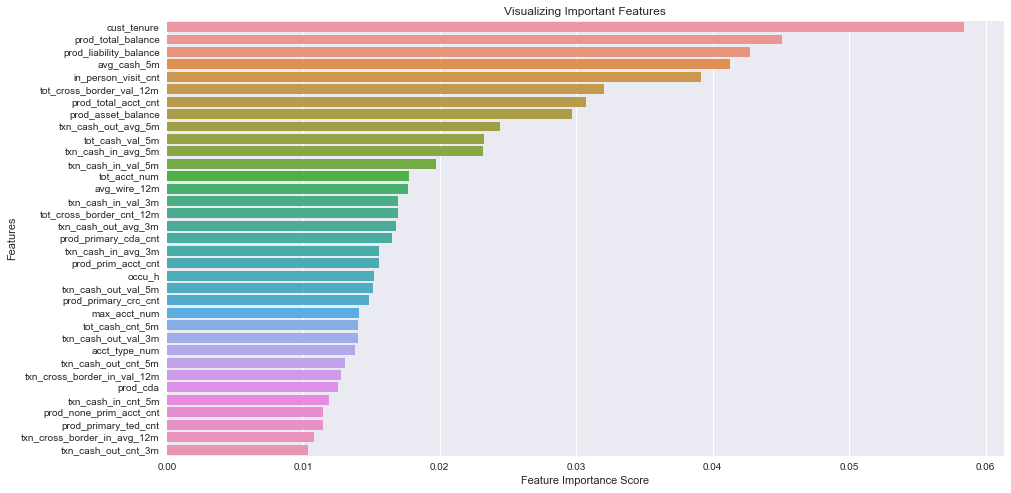

In [31]:
# Creating a bar plot
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = top_vars, y = top_vars.index)

# Add labels to your graph
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Model building

In [40]:
# Select top 35 scored variables
X_final = data_df[top_vars.index.tolist()]
y_final = data_df['rating'] 
X_final.shape

(588, 35)

In [41]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.3)

In [63]:
num_est = range(50, 500, 50)
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train_final, y = y_train_final, 
                                param_name = 'n_estimators', 
                                param_range = num_est)

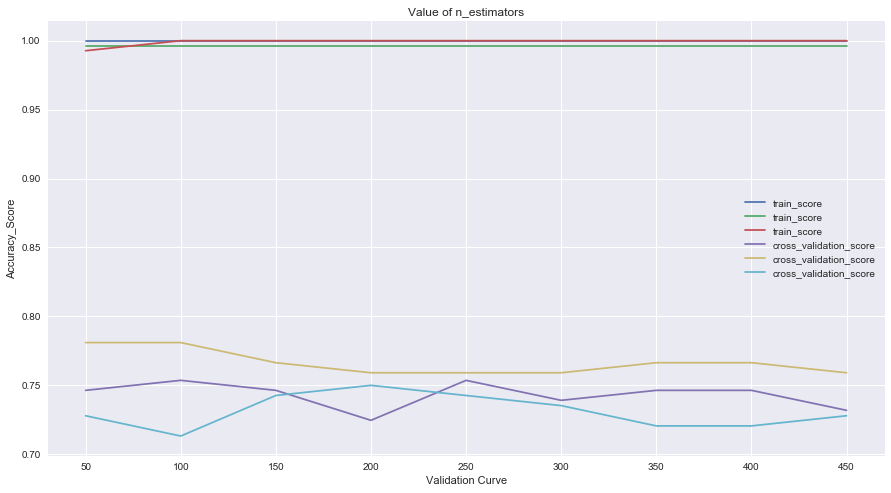

In [65]:
plt.plot(num_est, train_scoreNum, label='train_score')
plt.plot(num_est, test_scoreNum, label='cross_validation_score')
plt.xlabel("Validation Curve")
plt.ylabel("Accuracy_Score")
plt.title("Value of n_estimators")
plt.legend()
plt.show()

In [68]:
num_max_depth = range(2, 20, 2)
train_scoreDep, test_scoreDep = validation_curve(
                                RandomForestClassifier(),
                                X = X_train_final, y = y_train_final, 
                                param_name = 'max_depth', 
                                param_range = num_max_depth)

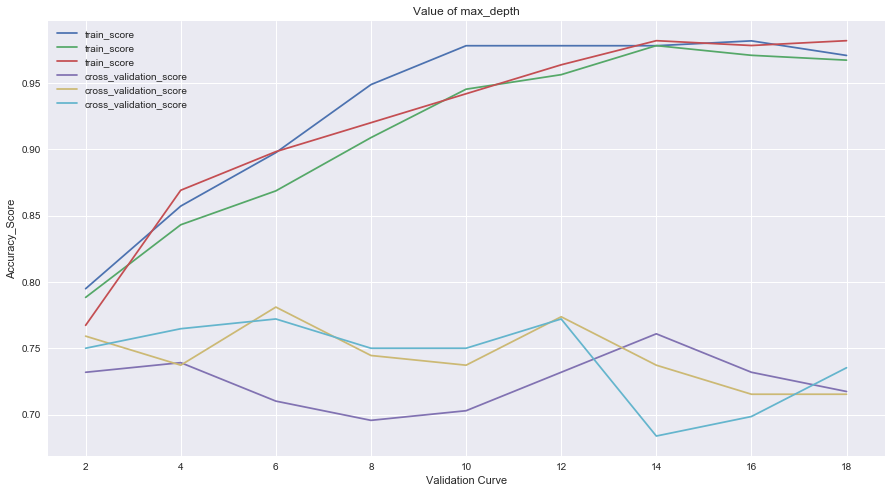

In [70]:
plt.plot(num_max_depth, train_scoreDep, label='train_score')
plt.plot(num_max_depth, test_scoreDep, label='cross_validation_score')
plt.xlabel("Validation Curve")
plt.ylabel("Accuracy_Score")
plt.title("Value of max_depth")
plt.legend()
plt.show()

In [71]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=150, max_depth= 12,bootstrap = True)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_final,y_train_final)

y_pred_final = clf.predict(X_test_final)

In [72]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_final, y_pred_final))

Accuracy: 0.7570621468926554
